# Pearson Correlation for wine dataset (Feature Selection)

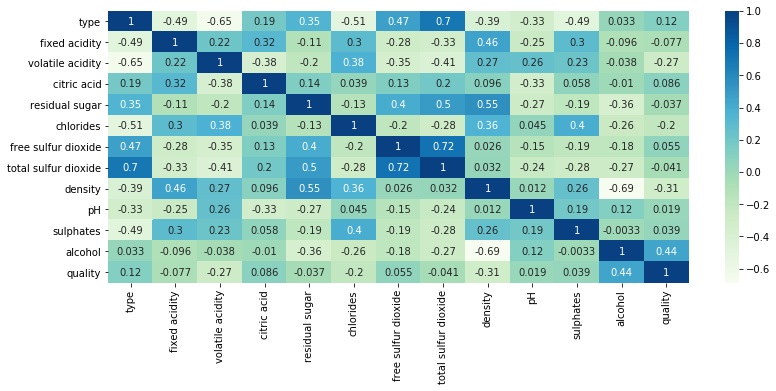

Correlated to quality :  ['density' 'alcohol']
Removed:  ['density']
Selected features:  ['alcohol']


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('winequalityN.csv')

def myfunction(x):
    if x == "red":
        return 0
    else:#white
        return 1
    
    
df["type"] = df["type"].apply(myfunction)

corr_mat = df.corr()

plt.figure(figsize=(13,5))
sns.heatmap(data=corr_mat, annot=True, cmap='GnBu')
plt.show()

target = 'quality'
candidates = corr_mat.index[
    (corr_mat[target] > 0.3) | (corr_mat[target] < -0.3)#0.3 is threshold
].values
candidates = candidates[candidates != target]
print('Correlated to', target, ': ', candidates)

removed = []
for c1 in candidates:
    for c2 in candidates:
        if (c1 not in removed) and (c2 not in removed):
            if c1 != c2:
                coef = corr_mat.loc[c1, c2]
                if coef > 0.6 or coef < -0.6:
                    removed.append(c1)
print('Removed: ', removed)

selected_features = [x for x in candidates if x not in removed]
print('Selected features: ', selected_features)


In [4]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
